<a href="https://colab.research.google.com/github/rahulsait/ExcelR-codes/blob/main/RIDGE_LASSO_ELASTICNET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ridge Regression :**

In [1]:
# import lib :

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# loading pre-defined "BOSTON" dataset :

boston_dataset = datasets.load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [3]:
# load the data and divide into x and y variables :

boston_pd = pd.DataFrame(boston_dataset.data)
boston_pd.columns = boston_dataset.feature_names
boston_pd_target = np.asarray(boston_dataset.target)
boston_pd["House Price"] = pd.Series(boston_pd_target)

# input :
X = boston_pd.iloc[:, :-1]

# output :
Y = boston_pd.iloc[:, -1]

print(boston_pd.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  House Price  
0     15.3  396.90   4.98         24.0  
1     17.8  396.90   9.14         21.6  
2     17.8  392.83   4.03         34.7  
3     18.7  394.63   2.94         33.4  
4     18.7  396.90   5.33         36.2  


In [4]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [5]:
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: House Price, Length: 506, dtype: float64

In [7]:
x_train, x_test, y_train, y_test = train_test_split(boston_pd.iloc[:, :-1], boston_pd.iloc[:, -1], test_size = 0.25)
(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

((379, 13), (379,), (127, 13), (127,))

In [9]:
# Apply multiple Linear Regression Model :

lreg = LinearRegression()
lreg.fit(x_train, y_train)

# Generate Prediction on test set :

lreg_y_pred = lreg.predict(x_test)

# calculating Mean Squared Error (MSE)

MSE = np.mean((lreg_y_pred - y_test)**2)
print("Mean Squared Error on test set : ", MSE)

# Merging the Coefficients and their corres. variable names :

lreg_coefficient = pd.DataFrame()
lreg_coefficient["Columns"] = x_train.columns
lreg_coefficient["Coefficient Estimate"] = pd.Series(lreg.coef_)
print(lreg_coefficient)

Mean Squared Error on test set :  24.868121340630907
    Columns  Coefficient Estimate
0      CRIM             -0.122499
1        ZN              0.035156
2     INDUS              0.013664
3      CHAS              2.658265
4       NOX            -17.504791
5        RM              3.667334
6       AGE             -0.004501
7       DIS             -1.477737
8       RAD              0.315172
9       TAX             -0.012145
10  PTRATIO             -0.935126
11        B              0.005457
12    LSTAT             -0.547981


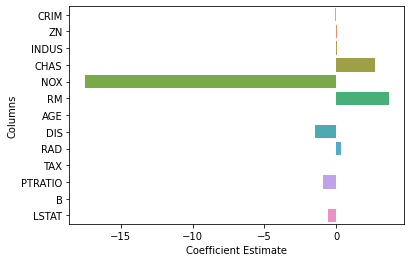

In [10]:
import seaborn as sns
sns.barplot(x = "Coefficient Estimate", y = "Columns", data = lreg_coefficient)

In [11]:
# import ridge regression from sklearn lib :

from sklearn.linear_model import Ridge

# Train the model :

ridgeR = Ridge(alpha = 1)
ridgeR.fit(x_train, y_train)
y_pred = ridgeR.predict(x_test)

# calculate MSR :

MSR_ridge = np.mean((y_pred - y_test)**2)
print(MSR_ridge)

# get ridhe coeff. and print them :

ridge_coefficient = pd.DataFrame()
ridge_coefficient["Columns"] = x_train.columns
ridge_coefficient["Coefficient Estimate"] = pd.Series(ridgeR.coef_)
print(ridge_coefficient)

25.116431166189866
    Columns  Coefficient Estimate
0      CRIM             -0.116391
1        ZN              0.035688
2     INDUS             -0.020901
3      CHAS              2.468909
4       NOX             -9.599452
5        RM              3.714580
6       AGE             -0.010819
7       DIS             -1.346381
8       RAD              0.305676
9       TAX             -0.013289
10  PTRATIO             -0.839285
11        B              0.005915
12    LSTAT             -0.560356


# **Lasso Regression :**

In [12]:
from sklearn.linear_model import Lasso

# Train the model :

lasso = Lasso(alpha = 1)
lasso.fit(x_train, y_train)
y_pred1 = lasso.predict(x_test)

# calculate MSE :

MSE = np.mean((y_pred1 - y_test)**2)
print("Mean Squared Error : ", MSE)
lasso_coeff = pd.DataFrame()
lasso_coeff["Columns"] = x_train.columns
lasso_coeff["Coefficient Estimate"] = pd.Series(lasso.coef_)

print(lasso_coeff)

Mean Squared Error :  31.371264638373603
    Columns  Coefficient Estimate
0      CRIM             -0.082704
1        ZN              0.035603
2     INDUS             -0.000000
3      CHAS              0.000000
4       NOX             -0.000000
5        RM              0.789711
6       AGE              0.021879
7       DIS             -0.584645
8       RAD              0.313779
9       TAX             -0.017041
10  PTRATIO             -0.661352
11        B              0.005122
12    LSTAT             -0.790772


# **Elastic Net :**

In [13]:
from sklearn.linear_model import ElasticNet

# Train the model :

e_net = ElasticNet(alpha = .4, l1_ratio = .5)
e_net.fit(x_train, y_train)

# calculate the prediction and MSE :

y_pred_elastic = e_net.predict(x_test)
MSE = np.mean((y_pred_elastic - y_test)**2)
print("Mean Squared Error : ", MSE)

e_net_coeff = pd.DataFrame()
e_net_coeff["Columns"] = x_train.columns
e_net_coeff["Coefficient Estimate"] = pd.Series(e_net.coef_)
e_net_coeff

Mean Squared Error :  28.34344675422641


,Columns,Coefficient Estimate
0,CRIM,-0.115816
1,ZN,0.040651
2,INDUS,-0.049342
3,CHAS,0.000000
4,NOX,-0.000000
5,RM,1.885579
6,AGE,0.004162
7,DIS,-0.996893
8,RAD,0.358194
9,TAX,-0.017664
